# Statistical Modeling 

Statistical modeling is a mathematical approach used to represent and analyze the relationships between variables in data. It involves constructing a model that captures the underlying patterns and structures within a dataset, often with the goal of making predictions or understanding the data better.


    Independent variables are also known as: predictor variables, input variables, explanatory variables, features
    
    Dependent variables are also known as: outcome variables, target variables, response variables


## Model Loss

A loss function evaluates how well your model represents the relationship between data variables.



## Simple Linear Regression

The model notation is 

$$y=mx+c$$

or, alternatively

$$y = \beta_0+ \beta_1 x $$

## Calculating M

### The Least-Squares Method

We can calculate $\hat{m}$ (the slope of the best-fit line) using this formula:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

Breaking down those components, we have:

* $\hat{m}$: the estimated slope
* $\rho$: the Pearson correlation, represented by the Greek letter "Rho"
* $S_y$: the standard deviation of the y values
* $S_x$: the standard deviation of the x values

## Calculating C

Then once we have the slope value ($\hat{m}$), we can put it back into our formula $(\hat{y} = \hat{m} x + \hat{c})$ to calculate the intercept. The idea is that

$$\bar{y} = \hat{c} + \hat{m} \bar{x}$$

so

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Breaking down those components, we have:

* $\hat{c}$: the estimated intercept
* $\bar{y}$: the mean of the y values
* $\hat{m}$: the estimated slope
* $\bar{x}$: the mean of the x values

In [3]:
# imports 

import numpy as np 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [4]:

# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

<AxesSubplot:>

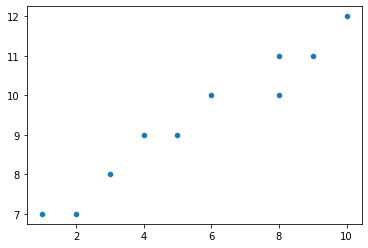

In [15]:
sns.scatterplot(x=X,y=Y)

Write a function `calc_slope` that returns $\hat{m}$ for a given set of x and y data.

The formula is:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

In [6]:
# calcute p-corr
p_corr = np.corrcoef(X,Y)[0][1]


In [7]:
# y std
std_y = np.std(Y)

In [8]:
# x std
std_x=np.std(X)

In [9]:
# calculate  m
m = p_corr*(std_y/std_x)

In [17]:
# slope function
def slope(X,Y):
    # corr_coef
    p_corr = np.corrcoef(X,Y)[0][1]
    #std y
    std_y = np.std(Y)
    #std X
    std_x = X.std()
    #m
    m = p_corr*(std_y/std_x)
    return m

In [11]:
# calculate slope for our data 


## Calculating the Intercept

Now that we have our estimated slope $\hat{m}$, we can calculate the estimated intercept $\hat{c}$.

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Write a function `calc_intercept` that returns $\hat{c}$ for a given $\hat{m}$, x, and y.


In [9]:
# get the y mean
Y_mean = Y.mean() 

In [11]:
# get the x mean
X_mean = np.mean(X)

In [19]:
# calculate the intecept
m = slope(X,Y)

In [21]:
# get the intercept function
def get_c(X,Y):
    #y mean
   Y_mean = Y.mean() 
   #x_mean
   X_mean = np.mean(X)
   m = slope(X,Y)
   
   c = Y_mean - (X_mean*m)
   
   return c
   

In [25]:
# get c for our data set 
c =Y.mean() - (X.mean()* slope(X,Y))
c

6.37962962962963

## Predicting a datapoint 

In [ ]:
y=slope(X,Y) * 1000 

In [17]:
# to predict a data point 


In [18]:
# reg plot


# Todo

In [19]:
# make a model for sales and any other column in the provided dataset

# Linear Rigression With StatsModel

An example of linear Regression model ands it evalution using stats model 

In [27]:
# read data and display head 
df = pd.read_csv("./data/advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [29]:
# get X and Y
X= df["TV"]
Y= df["sales"]



<AxesSubplot:xlabel='TV', ylabel='sales'>

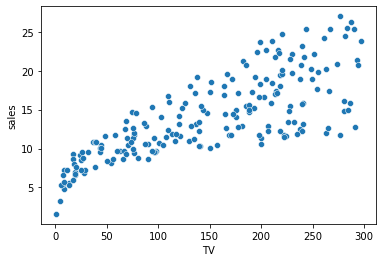

In [35]:
# scatter plot 
#Check if its possible to build a linear model
sns.scatterplot(x=X,y=Y)

<AxesSubplot:xlabel='TV', ylabel='sales'>

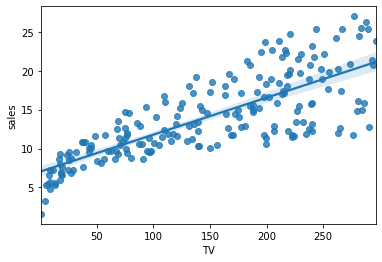

In [39]:
sns.regplot(x=X,y=Y)


In [47]:
# build model 
model=sm.OLS(endog=Y,exog=sm.add_constant(X))

In [57]:
# train the model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        15:29:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating and Interpreting the Model

### F-Test 
#### Measuring Statistical Significance

So, is our overall model statistically significant? Let's frame this in terms of a null and alternative hypothesis:

    H 0 (null hypothesis): the intercept-only model fits the data just as well as (or better than) our model
    H a (alternative hypothesis): our model fits the data better than the intercept-only model


In [65]:
# F1- score
results.f_pvalue,results.fvalue

(1.467389700194647e-42, 312.144994372713)

    *For fp-values below the significant value e.g 0.05 we reject the null hypothesis*

## R-Squared
#### Measuring Goodness of Fit
We can quantify how much of the variation in the dependent variable is explained by our model. This measure is called the R 2 or coefficient of determination.

In [67]:
#r2 score

results.rsquared

0.611875050850071

    *out put is a paercentage between 0 and 1 higher values are better*

### Other evaluation Metrics
#### Model parameters:

In [73]:
# y=mx+c
# m,c

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# X and y assumed to be defined (X = df['TV'], y = df['sales'])
X = sm.add_constant(X)  # add constant to X
model = sm.OLS(Y, X).fit()

# Model Parameters (m = slope, c = intercept)
intercept = model.params['const']
slope = model.params['TV']
print(f"Model: y = {slope:.4f} * x + {intercept:.4f}")

# Predictions
y_pred = model.predict(X)

# Evaluation Metrics
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model: y = 0.0475 * x + 7.0326
Mean Squared Error (MSE): 10.5127
Root Mean Squared Error (RMSE): 3.2423


#### Model parameter p-values:

In [75]:
# p-values  for m & c
# Assuming model has been fit with: results = model.fit()

# Get p-values
p_values = results.pvalues

# Display p-values for intercept and slope
print(f"p-value for Intercept (c): {p_values['const']:.4f}")
print(f"p-value for Slope (m): {p_values['TV']:.4f}")


p-value for Intercept (c): 0.0000
p-value for Slope (m): 0.0000


#### Model Confidence intervals 
returns value ranges at 95% percent confidence intervals 

In [77]:
# confidence intervals
# Assuming you already ran: results = model.fit()

# Display 95% confidence intervals for all coefficients
conf_intervals = results.conf_int()

print("Confidence Intervals (95%) for coefficients:")
print(conf_intervals)



Confidence Intervals (95%) for coefficients:
              0         1
const  6.129719  7.935468
TV     0.042231  0.052843
